<a href="https://colab.research.google.com/github/abdinegara783/FindIT2023/blob/Experiment/FIND_IT_UGM_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

# Import Library/Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import Dataset

In [2]:
#Path Training Datafrom Dataset
TrainingFeatures_path='/content/drive/MyDrive/DataFinditUGM/training_set_features.csv'
TrainingLabels_path='/content/drive/MyDrive/DataFinditUGM/training_set_labels.csv'

##Preprocessing TrainingFeatue_path

### Training set Preporcessing

In [21]:
# Membaca file CSV sebagai DataFrame
#Reading the TrainingFeatures CSV file as DataFrame
df_TrainingFeatures = pd.read_csv(TrainingFeatures_path)


# shows 5 first row from DataFrame
df_TrainingFeatures.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [8]:
#shows how many feature are there
print('This is the feature from datasets:\n{}'.format(df_TrainingFeatures.columns.tolist()))
print('\nThis datasets has {} Feature'.format(len(df_TrainingFeatures.columns)))

This is the feature from datasets:
['respondent_id', 'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'household_adults', 'household_children', 'employment_industry', 'employment_occupation']

This datasets has 36 Feature


In [48]:
df_TrainingFeatures.nunique()

respondent_id                  26707
h1n1_concern                       4
h1n1_knowledge                     3
behavioral_antiviral_meds          2
behavioral_avoidance               2
behavioral_face_mask               2
behavioral_wash_hands              2
behavioral_large_gatherings        2
behavioral_outside_home            2
behavioral_touch_face              2
doctor_recc_h1n1                   2
doctor_recc_seasonal               2
chronic_med_condition              2
child_under_6_months               2
health_worker                      2
health_insurance                   2
opinion_h1n1_vacc_effective        5
opinion_h1n1_risk                  5
opinion_h1n1_sick_from_vacc        5
opinion_seas_vacc_effective        5
opinion_seas_risk                  5
opinion_seas_sick_from_vacc        5
age_group                          5
education                          4
race                               4
sex                                2
income_poverty                     3
m

In [22]:
# Melihat tipe data pada setiap kolom pada df_TrainingFeatures
print(df_TrainingFeatures.dtypes)

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [23]:
def cek_missing_value(df):
    """Fungsi untuk melihat jumlah missing value pada setiap kolom di DataFrame"""
    # Menghitung jumlah missing value pada setiap kolom
    missing_value = df.isnull().sum()

    # Menghitung persentase missing value pada setiap kolom
    persentase_missing_value = (missing_value / len(df)) * 100

    # Membuat DataFrame untuk hasil perhitungan
    hasil = pd.DataFrame({'Missing Value': missing_value, 'Persentase': persentase_missing_value})

    return hasil
cek_missing_value(df_TrainingFeatures)


,Missing Value,Persentase
respondent_id,0,0.000000
h1n1_concern,92,0.344479
h1n1_knowledge,116,0.434343
behavioral_antiviral_meds,71,0.265848
behavioral_avoidance,208,0.778822
behavioral_face_mask,19,0.071142
behavioral_wash_hands,42,0.157262
behavioral_large_gatherings,87,0.325757
behavioral_outside_home,82,0.307036
behavioral_touch_face,128,0.479275


In [14]:
df_TrainingFeatures=df_TrainingFeatures.copy

In [29]:
def pisahkan_kolom_numerik(df):
    """Fungsi untuk memisahkan kolom numerik dan kolom non-numerik pada DataFrame"""
    kolom_numerik = df.select_dtypes(include=['int64', 'float64'])
    kolom_non_numerik = df.select_dtypes(exclude=['int64', 'float64'])

    return kolom_numerik, kolom_non_numerik

pisahkan_kolom_numerik(df_TrainingFeatures)

(       respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
 0                  0           1.0             0.0                        0.0   
 1                  1           3.0             2.0                        0.0   
 2                  2           1.0             1.0                        0.0   
 3                  3           1.0             1.0                        0.0   
 4                  4           2.0             1.0                        0.0   
 ...              ...           ...             ...                        ...   
 26702          26702           2.0             0.0                        0.0   
 26703          26703           1.0             2.0                        0.0   
 26704          26704           2.0             2.0                        0.0   
 26705          26705           1.0             1.0                        0.0   
 26706          26706           0.0             0.0                        0.0   
 
        behavi

In [32]:
df_TrainingFeatures_Num = kolom_numerik
df_TrainingFeatures_Obj = kolom_non_numerik

### Handling df_TrainingFeatures_Num

In [36]:
df_TrainingFeatures_Num['health_insurance'].unique()

array([ 1., nan,  0.])

**NOTE**: Data `'health_insurance'` hampir memiliki 50% data yang hilang sehingga bisa dihilangkan

In [37]:
def hapus_kolom(df, nama_kolom):
    """Fungsi untuk menghapus sebuah kolom pada DataFrame"""
    df.drop(nama_kolom, axis=1, inplace=True)
    return df
hapus_kolom(df_TrainingFeatures_Num, 'health_insurance')

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [44]:
import pandas as pd

def imputasi_dengan_modus(df):
    """Fungsi untuk melakukan imputasi dengan modus pada semua kolom dengan missing value dalam DataFrame"""
    kolom_dengan_missing = df.columns[df.isnull().any()]
    for kolom in kolom_dengan_missing:
        modus = df[kolom].mode().iloc[0]
        df[kolom].fillna(modus, inplace=True)
    return df
imputasi_dengan_modus(df_TrainingFeatures_Num)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,0.0,0.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,5.0,4.0,4.0,4.0,2.0,4.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,3.0,3.0,5.0,5.0,4.0,1.0,0.0,0.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,3.0,1.0,1.0,5.0,2.0,2.0,0.0,0.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,4.0,4.0,2.0,5.0,4.0,2.0,0.0,0.0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0


In [ ]:
cek_missing_value(df_TrainingFeatures_Num)

,Missing Value,Persentase
respondent_id,0,0.0
h1n1_concern,0,0.0
h1n1_knowledge,0,0.0
behavioral_antiviral_meds,0,0.0
behavioral_avoidance,0,0.0
behavioral_face_mask,0,0.0
behavioral_wash_hands,0,0.0
behavioral_large_gatherings,0,0.0
behavioral_outside_home,0,0.0
behavioral_touch_face,0,0.0


In [46]:

def ubah_float_ke_int(df):
    """Fungsi untuk mengubah semua nilai float dalam seluruh kolom DataFrame menjadi integer"""
    df = df.astype(int)
    return df
ubah_float_ke_int(df_TrainingFeatures_Num)

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children
0,0,1,0,0,0,0,0,0,1,1,...,0,0,3,1,2,2,1,2,0,0
1,1,3,2,0,1,0,1,0,1,1,...,0,0,5,4,4,4,2,4,0,0
2,2,1,1,0,1,0,0,0,0,0,...,0,0,3,1,1,4,1,2,2,0
3,3,1,1,0,1,0,1,1,0,0,...,0,0,3,3,5,5,4,1,0,0
4,4,2,1,0,1,0,1,1,0,1,...,0,0,3,3,2,3,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2,0,0,1,0,0,0,1,0,...,0,0,3,1,1,5,2,2,0,0
26703,26703,1,2,0,1,0,1,0,0,0,...,0,1,4,2,2,5,1,1,1,0
26704,26704,2,2,0,1,1,1,1,0,1,...,0,0,4,4,2,5,4,2,0,0
26705,26705,1,1,0,0,0,0,0,0,1,...,0,0,3,1,2,2,1,2,1,0


Handling `'df_TrainingFeatures_Obj'`

In [54]:
cek_missing_value(df_TrainingFeatures_Obj)

,Missing Value,Persentase
age_group,0,0.000000
education,1407,5.268282
race,0,0.000000
sex,0,0.000000
income_poverty,4423,16.561201
marital_status,1408,5.272026
rent_or_own,2042,7.645936
employment_status,1463,5.477965
hhs_geo_region,0,0.000000
census_msa,0,0.000000


kolom `'employment_industry'` dan kolom `'employment_occupation'` memiliki jumlah missing vallue dan kardinalitas yang cukup besar sehingga bisa dihilangkan


In [55]:
hapus_kolom(df_TrainingFeatures_Obj, 'employment_industry')
hapus_kolom(df_TrainingFeatures_Obj, 'employment_occupation')

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City"
...,...,...,...,...,...,...,...,...,...,...
26702,65+ Years,Some College,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,qufhixun,Non-MSA
26703,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,lzgpxyit,"MSA, Principle City"
26704,55 - 64 Years,Some College,White,Female,NaN,Not Married,Own,NaN,lzgpxyit,"MSA, Not Principle City"
26705,18 - 34 Years,Some College,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,lrircsnp,Non-MSA


In [59]:
df_TrainingFeatures_Obj = imputasi_dengan_modus(df_TrainingFeatures_Obj)

In [61]:
cek_missing_value(df_TrainingFeatures_Obj)

,Missing Value,Persentase
age_group,0,0.0
education,0,0.0
race,0,0.0
sex,0,0.0
income_poverty,0,0.0
marital_status,0,0.0
rent_or_own,0,0.0
employment_status,0,0.0
hhs_geo_region,0,0.0
census_msa,0,0.0


In [60]:
df_TrainingFeatures_Obj.nunique()

age_group             5
education             4
race                  4
sex                   2
income_poverty        3
marital_status        2
rent_or_own           2
employment_status     3
hhs_geo_region       10
census_msa            3
dtype: int64

Perlu Terlebih dathulu dianalisis bahwa `'age_group'` dan `'education'` memperhatikan urutan sehingga bisa menggunakan Label Encoding. Sedangkan `' hhs_geo_region'`Bisa menggunakan Hash encoding karena jumlah kardinalitasya sangat banyak. Sisanya bisa pakai One-Hot Encoding


In [64]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
#import category_encoders as ce

def label_encoding(df, kolom):
    """Fungsi untuk melakukan Label Encoding pada kolom kategorik dalam DataFrame"""
    df[kolom] = df[kolom].astype('category')
    df[kolom] = df[kolom].cat.codes
    return df

def one_hot_encoding(df, kolom):
    """Fungsi untuk melakukan One-Hot Encoding pada kolom kategorik dalam DataFrame"""
    df = pd.get_dummies(df, columns=[kolom])
    return df
#def hash_encoding(df, kolom):
#    """Fungsi untuk melakukan Hash Encoding pada kolom kategorik dalam DataFrame"""
#    he = ce.HashingEncoder(cols=[kolom], n_components=10)
#    df = he.fit_transform(df)
#    return df


In [66]:
df_TrainingFeatures_Obj=label_encoding(df_TrainingFeatures_Obj, 'age_group')
df_TrainingFeatures_Obj=label_encoding(df_TrainingFeatures_Obj, 'education')

In [69]:
#df_TrainingFeatures_Obj=one_hot_encoding(df_TrainingFeatures_Obj, 'race')
df_TrainingFeatures_Obj=one_hot_encoding(df_TrainingFeatures_Obj, 'income_poverty')
df_TrainingFeatures_Obj=one_hot_encoding(df_TrainingFeatures_Obj, 'employment_status')
df_TrainingFeatures_Obj=one_hot_encoding(df_TrainingFeatures_Obj, 'census_msa')

Langkah selanjutnya yaitu menyatukan kedua data numerik dan non-numerik tadi

In [73]:
def gabung_dataframe(df1, df2):
    """Fungsi untuk menggabungkan dua DataFrame dengan jenis data yang berbeda"""
    df_gabungan = pd.concat([df1, df2], axis=1)
    return df_gabungan
df_TrainingFeatures = gabung_dataframe(df_TrainingFeatures_Num,df_TrainingFeatures_Obj)

In [76]:
df_TrainingFeatures.dtype()

AttributeError: ignored

In [70]:
hapus_kolom(df_TrainingFeatures_Obj,'hhs_geo_region')

,age_group,education,sex,marital_status,rent_or_own,race_Black,race_Hispanic,race_Other or Multiple,race_White,"income_poverty_<= $75,000, Above Poverty","income_poverty_> $75,000",income_poverty_Below Poverty,employment_status_Employed,employment_status_Not in Labor Force,employment_status_Unemployed,"census_msa_MSA, Not Principle City","census_msa_MSA, Principle City",census_msa_Non-MSA
0,3,1,Female,Not Married,Own,0,0,0,1,0,0,1,0,1,0,0,0,1
1,1,0,Male,Not Married,Rent,0,0,0,1,0,0,1,1,0,0,1,0,0
2,0,2,Male,Not Married,Own,0,0,0,1,1,0,0,1,0,0,1,0,0
3,4,0,Female,Not Married,Rent,0,0,0,1,0,0,1,0,1,0,0,1,0
4,2,3,Female,Married,Own,0,0,0,1,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,4,3,Female,Not Married,Own,0,0,0,1,1,0,0,0,1,0,0,0,1
26703,0,2,Male,Not Married,Rent,0,0,0,1,1,0,0,1,0,0,0,1,0
26704,3,3,Female,Not Married,Own,0,0,0,1,1,0,0,1,0,0,1,0,0
26705,0,3,Female,Married,Rent,0,1,0,0,1,0,0,1,0,0,0,0,1


In [72]:
#df_TrainingFeatures_Obj=label_encoding(df_TrainingFeatures_Obj, 'sex')
df_TrainingFeatures_Obj=label_encoding(df_TrainingFeatures_Obj, 'marital_status')
df_TrainingFeatures_Obj=label_encoding(df_TrainingFeatures_Obj, 'rent_or_own')

In [5]:
# Membaca file CSV sebagai DataFrame
#Reading the LabelFeatures CSV file as DataFrame
df_LabelFeatures = pd.read_csv(TrainingLabels_path)


# shows 5 first row from DataFrame
df_LabelFeatures.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


### Test Set Preprocessing

In [6]:
#Path Testing Data From Dataset
TestFeatures_path='/content/drive/MyDrive/DataFinditUGM/test_set_features.csv'

In [7]:
# Membaca file CSV sebagai DataFrame
#Reading the LabelFeatures CSV file as DataFrame
df_TestFeatures = pd.read_csv(TestFeatures_path)


# shows 5 first row from DataFrame
df_TestFeatures.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


# EDA (Explanatory Data Analysis)

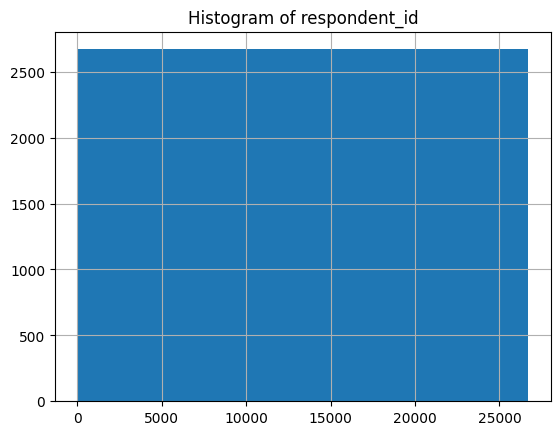

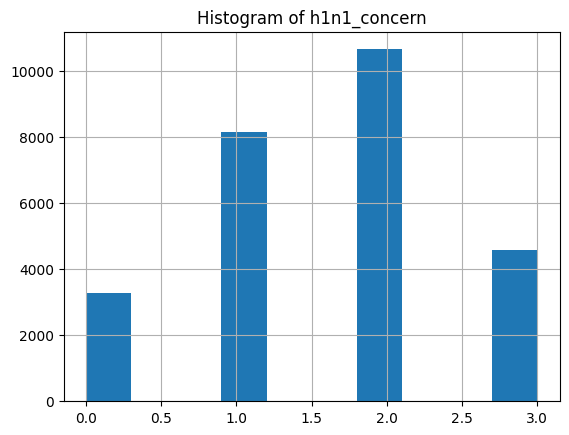

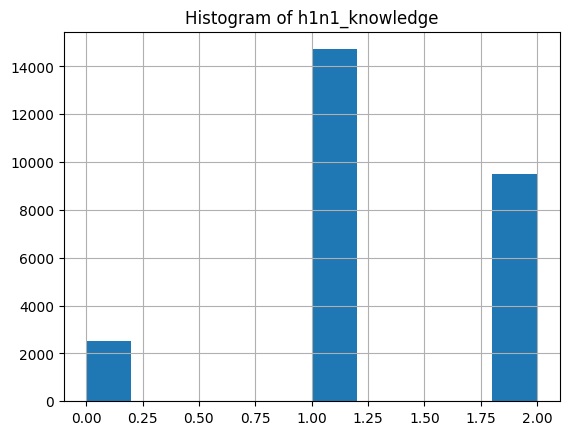

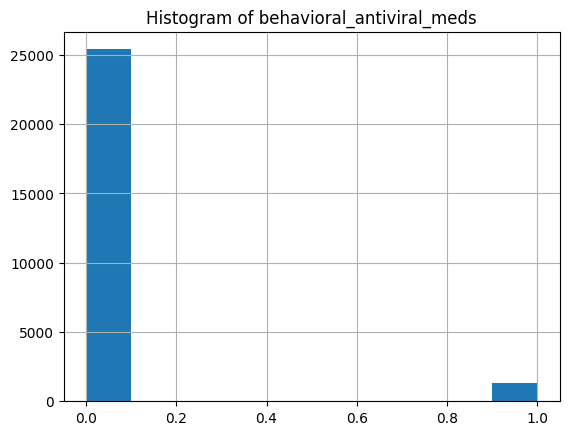

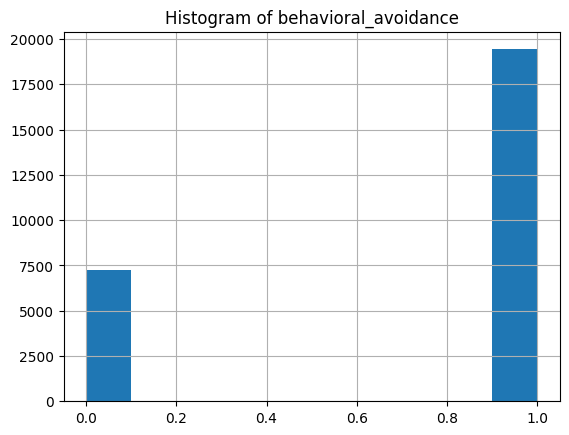

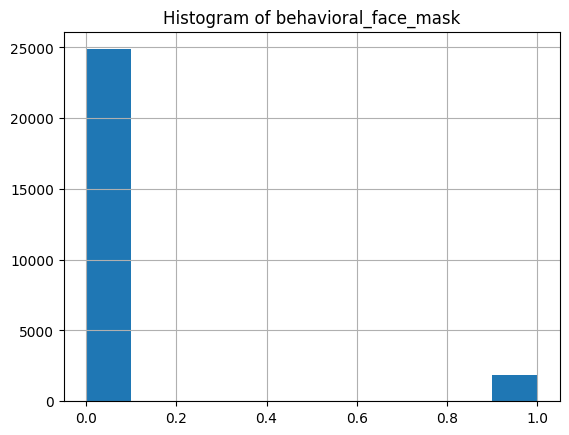

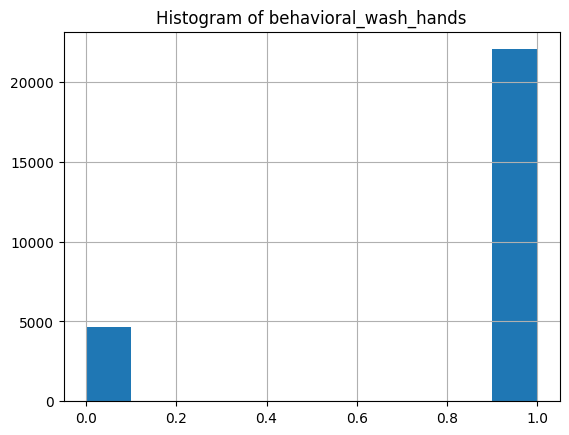

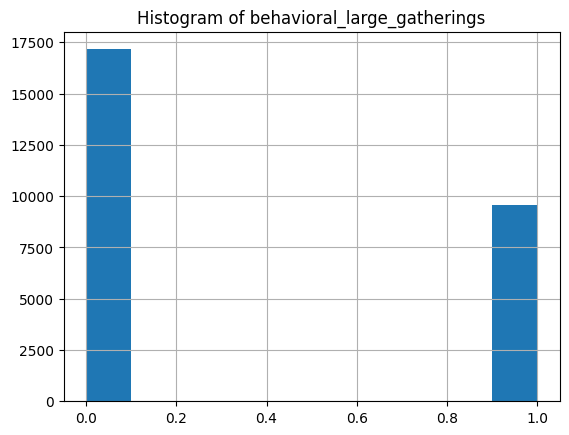

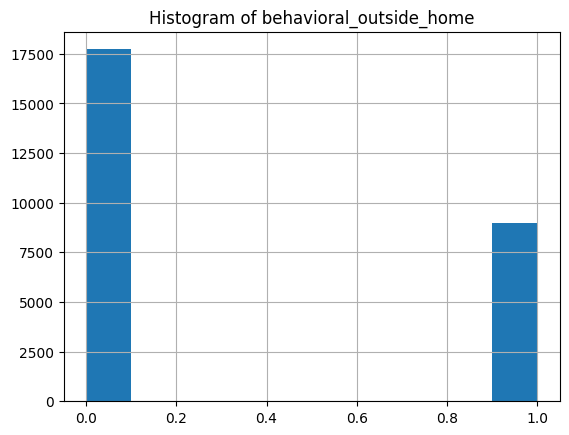

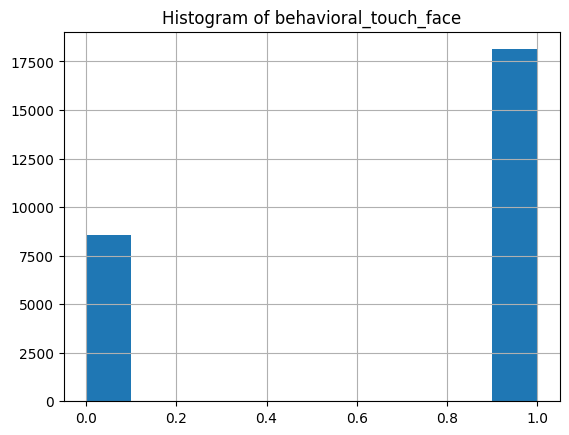

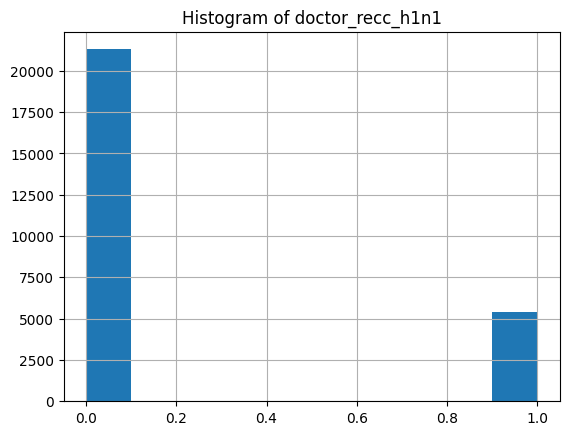

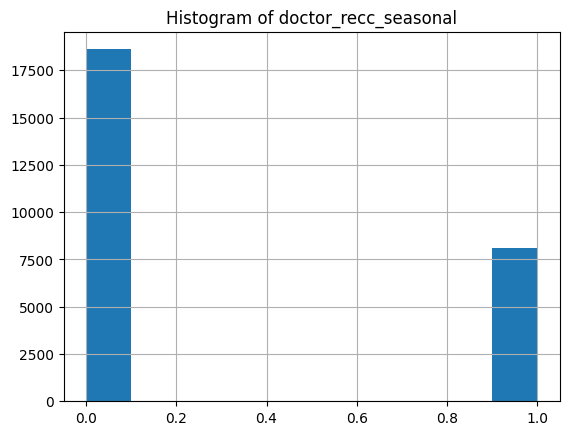

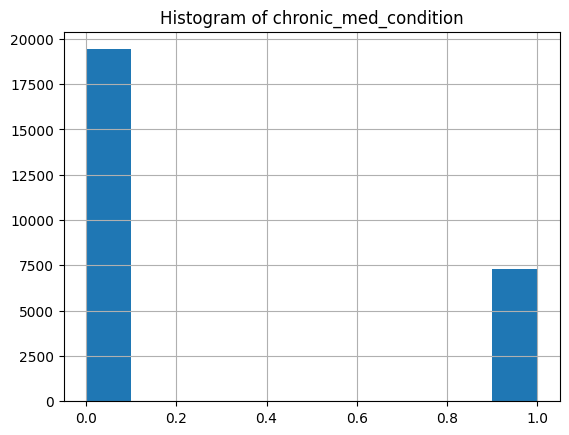

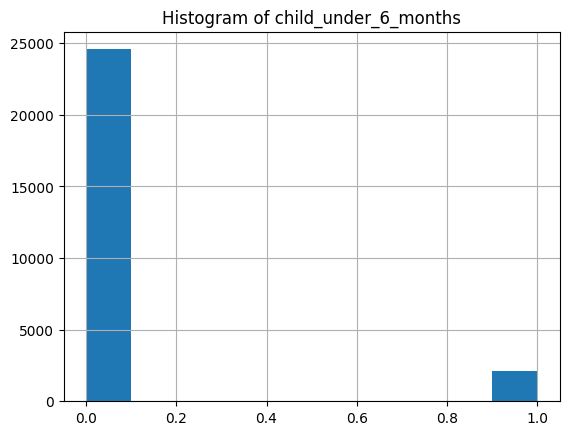

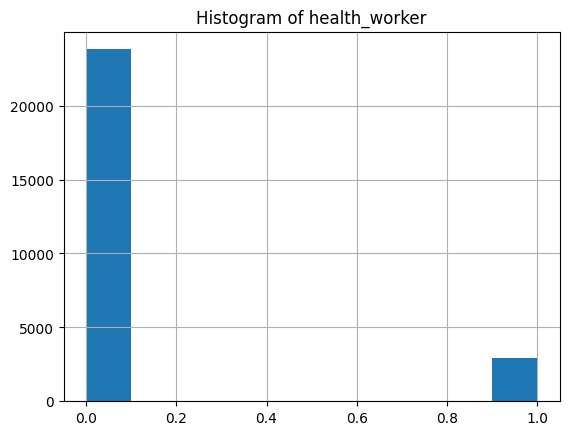

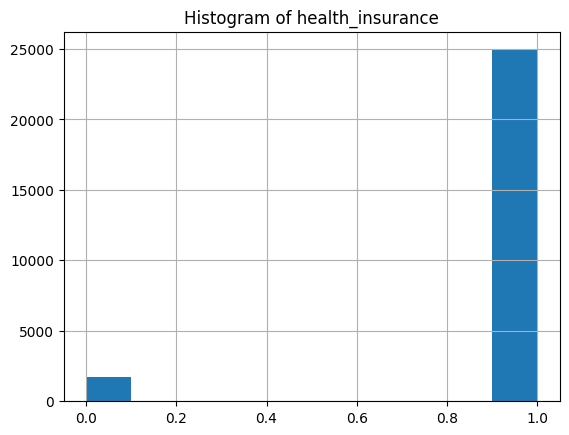

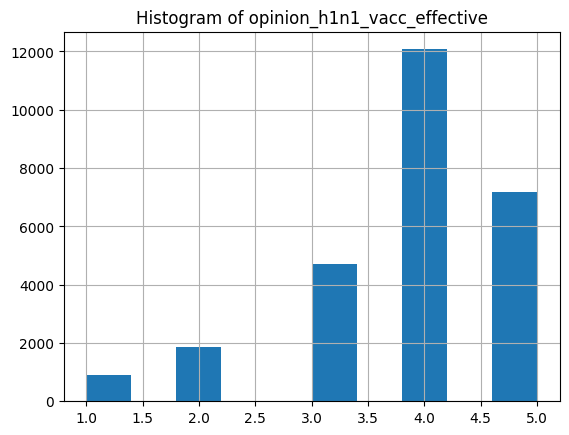

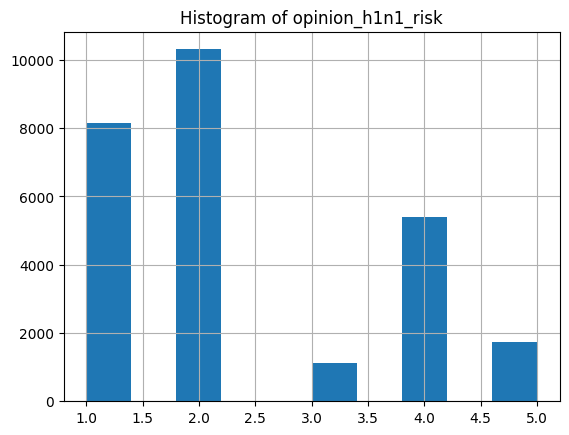

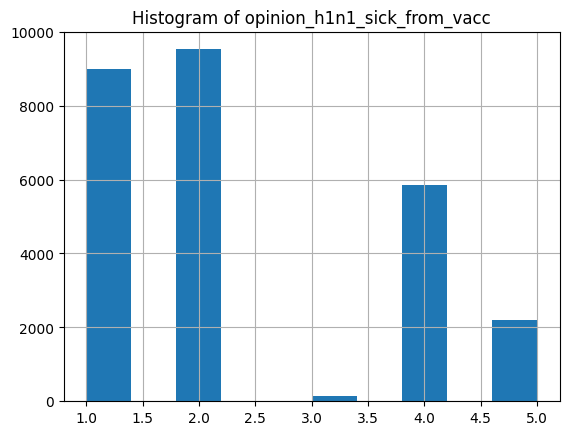

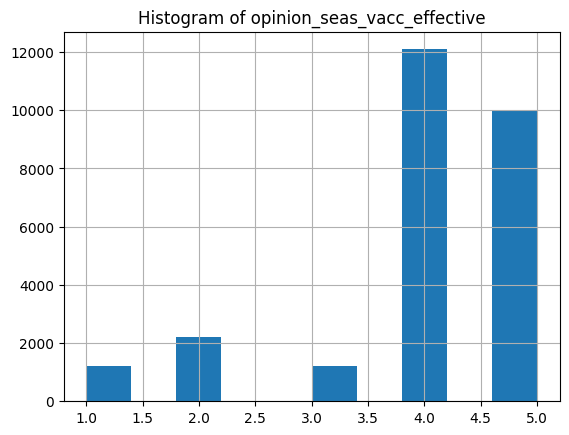

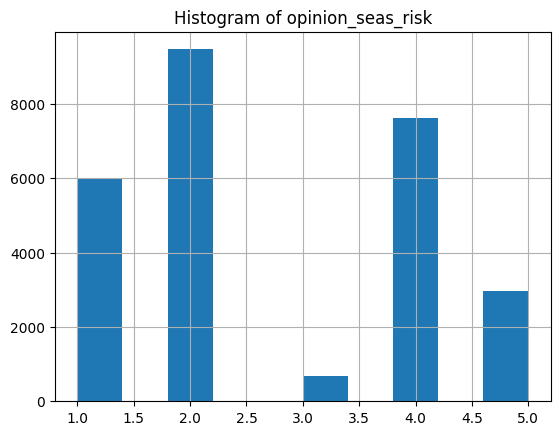

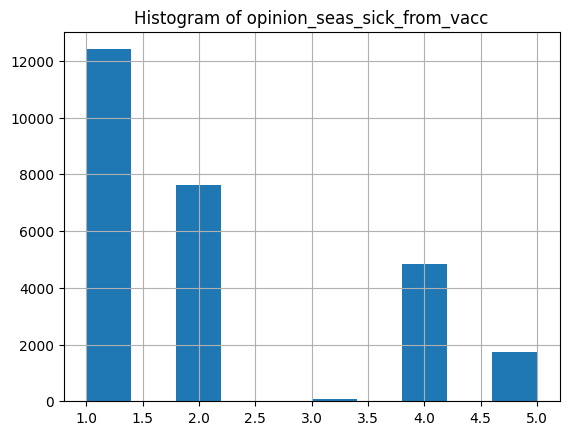

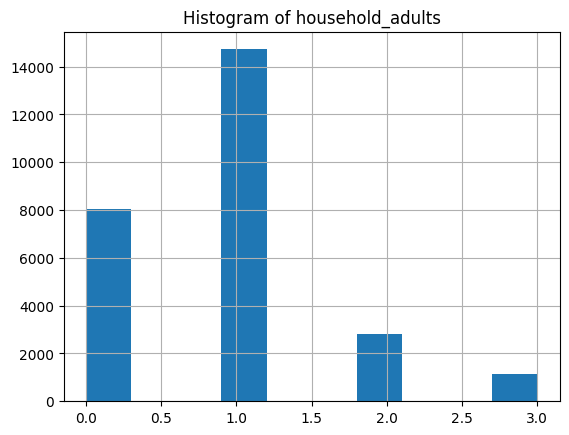

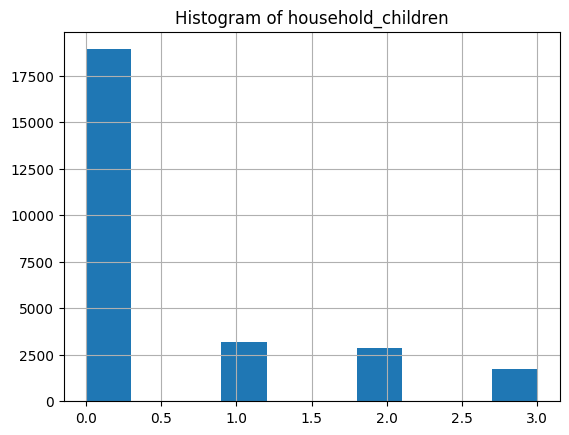

In [ ]:

def visualize_data(df):
    """
    Fungsi untuk menampilkan visualisasi banyaknya variabel pada setiap kolom dataframe.
    """
    # Cek tipe data setiap kolom
    column_types = df.dtypes

    # Looping untuk setiap kolom
    for column in df.columns:
        # Hanya tampilkan visualisasi jika tipe datanya numerik
        if column_types[column] in ['int64', 'float64']:
            # Buat histogram
            df[column].hist(bins=10)
            plt.title(f'Histogram of {column}')
            plt.show()
visualize_data(df_TrainingFeatures)

In [ ]:
print(df_TrainingFeatures.isnull().sum())

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [ ]:
df_TrainingFeatures.copy

<bound method NDFrame.copy of        respondent_id  h1n1_concern  h1n1_knowledge  behavioral_antiviral_meds  \
0                  0           1.0             0.0                        0.0   
1                  1           3.0             2.0                        0.0   
2                  2           1.0             1.0                        0.0   
3                  3           1.0             1.0                        0.0   
4                  4           2.0             1.0                        0.0   
...              ...           ...             ...                        ...   
26702          26702           2.0             0.0                        0.0   
26703          26703           1.0             2.0                        0.0   
26704          26704           2.0             2.0                        0.0   
26705          26705           1.0             1.0                        0.0   
26706          26706           0.0             0.0                        0.0  

In [ ]:
df_TrainingFeatures = df_TrainingFeatures.fillna(df_TrainingFeatures.mode().iloc[0])

# Cek missing value setelah diisi dengan modus
print(df_TrainingFeatures.isnull().sum())

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [ ]:
# Melihat semua kolom pada dataframe yang bukan numerik
non_numeric_columns = df_TrainingFeatures.select_dtypes(exclude=['int64', 'float64']).columns

print('Kolom yang bukan numerik:')
df_TrainingFeatures[non_numeric_columns].nunique()


Kolom yang bukan numerik:


age_group                 5
education                 4
race                      4
sex                       2
income_poverty            3
marital_status            2
rent_or_own               2
employment_status         3
hhs_geo_region           10
census_msa                3
employment_industry      21
employment_occupation    23
dtype: int64

In [ ]:
df_TrainingFeatures['employment_occupation'].dtype

dtype('O')

In [ ]:
df_TrainingLabels = pd.read_csv(TrainingLabels_path)
df_TrainingLabels

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [ ]:
df_TrainingFeatures=df_numerik.astype(int)
df_TrainingFeatures = df_TrainingFeatures.fillna(df_TrainingFeatures.mode().iloc[0])

# Cek missing value setelah diisi dengan modus
print(df_TrainingFeatures.isnull().sum())

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
household_adults               0
household_children             0
dtype: int64


# Feature Enginering

# Feature Selection

In [ ]:
import numpy as np
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

def objective_function(X, y, feature_subset):
    model = LogisticRegression()
    scores = cross_val_score(model, X[:, feature_subset], y, cv=5)
    return np.mean(scores)

def binary_bat_algorithm(X, y, n_bats=10, n_iterations=100, a=0.9, r0=0.5):
    n_features = X.shape[1]
    bats = np.random.randint(0, 2, (n_bats, n_features))
    velocities = np.random.uniform(-1, 1, (n_bats, n_features))
    frequencies = np.random.uniform(0, 2, n_bats)
    best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    for _ in range(n_iterations):
        for i, bat in enumerate(bats):
            velocities[i] += (bat - best_bat) * frequencies[i]
            new_bat = (bat + velocities[i]).clip(0, 1)
            new_bat = (np.random.rand(n_features) < new_bat).astype(int)

            if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                bats[i] = new_bat

            if np.random.rand() > r0:
                new_bat = best_bat + np.random.uniform(-a, a, n_features)
                new_bat = (np.random.rand(n_features) < new_bat).astype(int)

                if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                    bats[i] = new_bat

        best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    return best_bat



In [ ]:
df_TrainingLabels['h1n1_vaccine']

0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

In [ ]:
X, y = df_TrainingFeatures.values, df_TrainingLabels['h1n1_vaccine'].values
selected_features = binary_bat_algorithm(X, y)
print("Selected features:", selected_features)

Selected features: [1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1]


In [ ]:
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

def objective_function(X, y, feature_subset):
    model = RandomForestClassifier()
    scores = cross_val_score(model, X[:, feature_subset], y, cv=5, scoring='f1')
    return np.mean(scores)

def binary_bat_algorithm(X, y, n_bats=10, n_iterations=100, a=0.9, r0=0.5):
    n_features = X.shape[1]
    bats = np.random.randint(0, 2, (n_bats, n_features))
    velocities = np.random.uniform(-1, 1, (n_bats, n_features))
    frequencies = np.random.uniform(0, 2, n_bats)
    best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    for _ in range(n_iterations):
        for i, bat in enumerate(bats):
            velocities[i] += (bat - best_bat) * frequencies[i]
            new_bat = (bat + velocities[i]).clip(0, 1)
            new_bat = (np.random.rand(n_features) < new_bat).astype(int)

            if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                bats[i] = new_bat

            if np.random.rand() > r0:
                new_bat = best_bat + np.random.uniform(-a, a, n_features)
                new_bat = (np.random.rand(n_features) < new_bat).astype(int)

                if objective_function(X, y, new_bat) > objective_function(X, y, bat):
                    bats[i] = new_bat

        best_bat = bats[np.argmax([objective_function(X, y, bat) for bat in bats])]

    return best_bat


# Modeling

# Evaluating